ChEn-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **29Sep21**

# 05b. Rayleigh-Ritz Method w/ Finite Element Lagrange Basis Functions
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Dirichlet Boundary Conditions](#problem)
1. [Rayleigh-Ritz Method with Built-in **Homogeneous** Dirichlet Boundary Conditions](#rayleigh-ritz-homogeneous)
   + [Data](#data-homogeneous)
   + [Finite Element Lagrange Basis Functions](#fem-lagrange-basis-homogeneous)
   + [Results](#results-homogeneous)
   + [Results: Mesh Convergence](#results-homogeneous-mesh-convergence)
1. [Rayleigh-Ritz Method with Built-in **Inhomogeneous** Dirichlet Boundary Conditions](#rayleigh-ritz-inhomogeneous)
   + [Data](#data-inhomogeneous)
   + [Lift function](#lift-function)
   + [Finite Element Lagrange Basis Functions](#fem-lagrange-basis-inhomogeneous)
   + [Results](#results-inhomogeneous)
   + [Results: Mesh Convergence](#results-inhomogeneous-mesh-convergence)
---

## [Objectives](#toc)<a id="obj"></a>

 + Describe the Rayleigh-Ritz method for solving linear differential equations with symmetric positive definite operators ([OneNote notes: rayleigh-ritz-method](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EsTzIb2Mcv5OkcSk0kSXXF8BXM4OnlzGfAd7sdcWLky-Gw?e=nglTrN).
 + Use the function approximation theory described in the course (see previous notebooks and notes).
 + Apply the finite element Lagrange basis functions.

## [Poisson Problem with Dirichlet Boundary Conditions](#toc)<a id="problem"></a>

The following sections describe what is referred to in the literature as the one-dimensional Poisson problem with Dirichlet boundary conditions. This is a classical boundary-value problem of mathematics.

Solve the Poisson model problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D(x)\, u'\bigr)'(x) + S(x)\,u(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in [a,b], \\
 u(a) &= u_a, \\
 u(b) &= u_b.
\end{align*}
   
This problem is linear and has an analytical solution for given data: diffusion coefficient, $D(x)$, source, $S(x)$ slope, source bias, $f(x)$. The *diffusion flux* associated to the quantity $u$, is denoted $q := -D(x)\,u'$, and it is often of interest as a derived quantity.

The values of the dependent variable are given on the two end points of the domain. This is called *essential* boundary conditions or  *Dirichlet boundary conditions*. If the values are equal to zero, the boundary condition is referred to as homogeneous.

## [Rayleigh-Ritz Method w/ Built-in Homogeneous Dirichlet Boundary Conditions](#toc)<a id="rayleigh-ritz-homogeneous"></a>

Find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
  \norm{u-u^*_N}^2_{\Ecal} = \min\limits_{u_N\, \in\, V_N} \norm{u-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid u_N(a) = u_N(b) = 0, (u'_N,u'_N) < \infty \bigr\}$
and $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (D\,\phi'_i,\phi'_j) - (S\,\phi_i,\phi_j)$
  + $b_i = (f,\phi_i)$
  
This formulation only accommodates basis functions that satisfy the homogeneous boundary conditions.

### [Data (Homogeneous)](#toc)<a id="data-homogeneous"></a>

Solve problem with parameter values:

> + a = 0 cm
> + b = 25 cm
> + $u_a$ = 0 g/cc
> + $u_b$ = 0 g/cc
> + D = 0.1 cm^2/s
> + S = value below $s^{-1}$
> + f = value below g/cc-s

In [1]:
'''Domain'''

x_a = 0
x_b = 25

In [2]:
'''Parameters and data'''

diff_coeff_value = 0.1
source_bias_value = 1e-2
source_slope_value = -1e-2

u_a = 0
u_b = 0

# shape pts =  3


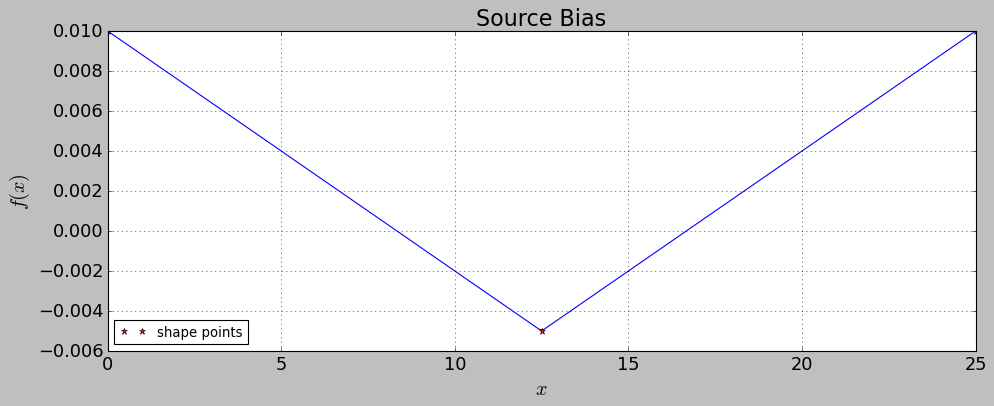

In [3]:
'''Generate the source bias'''

try:    
    from engy_5310.toolkit import TargetFunction   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

shape_pts = [(x_a,source_bias_value), (x_b,source_bias_value)]
shape_pts = [(x_a,source_bias_value), ((x_b+x_a)/2,-2*source_bias_value/4), (x_b,source_bias_value)]
#shape_pts = [(x_a,source_bias_value), ((x_b+x_a)/8,-2*source_bias_value), ((x_b+x_a)/4,source_bias_value), (3*(x_b+x_a)/4,2*source_bias_value), (x_b,source_bias_value)]

print('# shape pts = ', len(shape_pts))

source_bias = TargetFunction(shape_pts, type='stepwise')
source_bias = TargetFunction(shape_pts, type='linear')
#source_bias = TargetFunction(shape_pts, type='legendre')
  
source_bias.plot(n_plot_pts=200, show_shape_pts=True, title='Source Bias')

# shape pts =  5


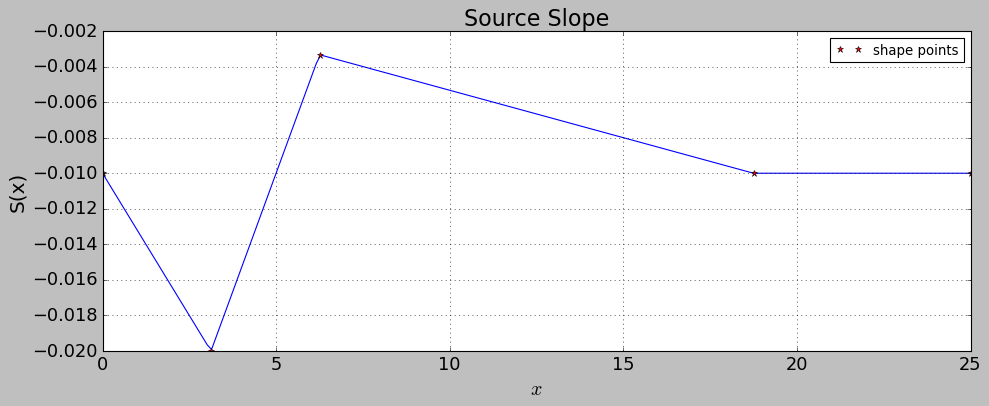

In [4]:
'''Generate the source slope'''

try:    
    from engy_5310.toolkit import TargetFunction   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

shape_pts = [(x_a,source_slope_value), (x_b,source_slope_value)]
#shape_pts = [(x_a,source_slope_value), ((x_b+x_a)/2,1.2*source_slope_value), (x_b,source_slope_value)]
shape_pts = [(x_a,source_slope_value), ((x_b+x_a)/8,2*source_slope_value), ((x_b+x_a)/4,source_slope_value/3), (3*(x_b+x_a)/4,source_slope_value), (x_b,source_slope_value)]

print('# shape pts = ', len(shape_pts))

source_slope = TargetFunction(shape_pts, type='legendre')
source_slope = TargetFunction(shape_pts, type='linear')
  
source_slope.plot(n_plot_pts=200, show_shape_pts=True, y_label='S(x)', title='Source Slope')

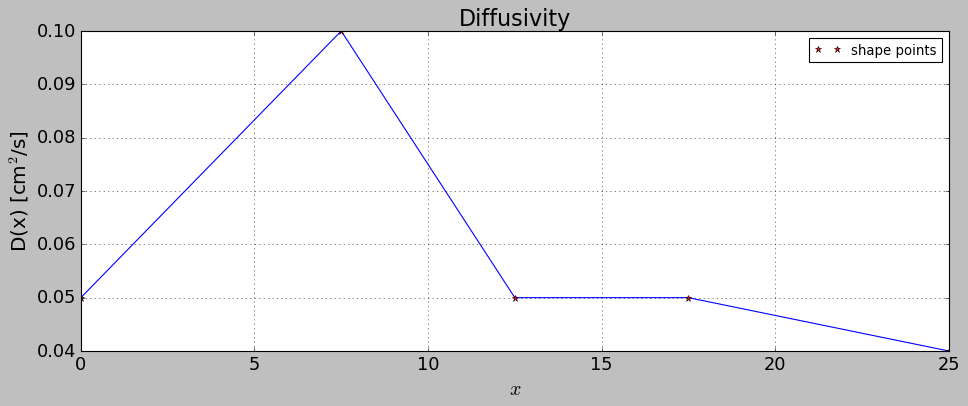

In [5]:
'''Diffusion coefficient'''

from engy_5310.toolkit import TargetFunction   

shape_pts = [(x_a, 0.5*diff_coeff_value), ((x_a+x_b)/2*0.6, diff_coeff_value), ((x_a+x_b)/2, 0.5*diff_coeff_value), ((x_a+x_b)/2*1.4, 0.5*diff_coeff_value), (x_b, 0.4*diff_coeff_value)]

diff_coeff = TargetFunction(shape_pts, type='linear')
#diff_coeff = TargetFunction(shape_pts, type='legendre')
  
diff_coeff.plot(n_plot_pts=500, show_shape_pts=True, title='Diffusivity', y_label=r'D(x) [cm$^2$/s]')

### [Finite Element Lagrange Basis Functions](#toc)<a id="fem-lagrange-basis-homogeneous"></a>

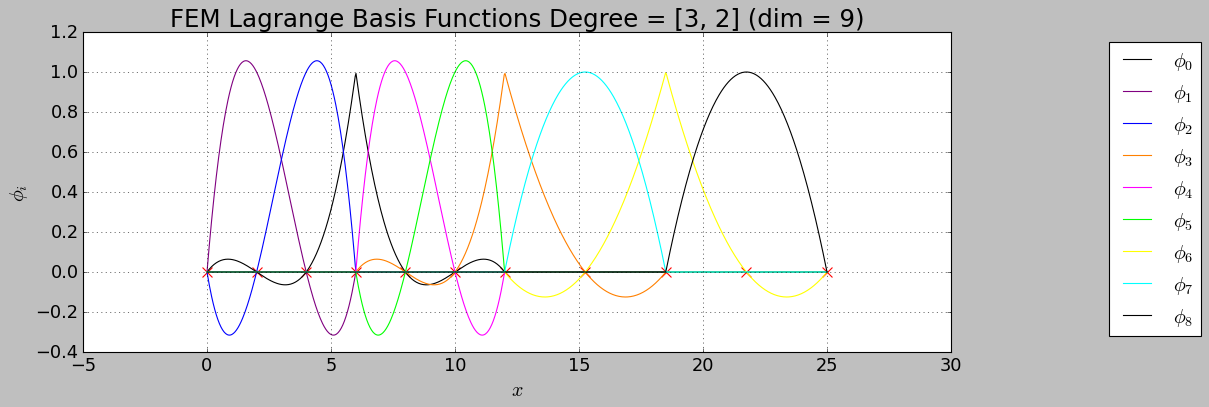

In [6]:
'''Build the basis functions'''

try:    
    from engy_5310.toolkit import LagrangeFEMBasis  
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

degree = [3,2]
n_elem = [2,2]

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, 12, x_b], bc_x_min='dirichlet', bc_x_max='dirichlet')
femlb.plot(n_plot_pts=800)

In [7]:
'''Mesh artifacts'''

# Domain partition
print('Mesh')
for e_id, partition in enumerate(femlb.patches):
    printout = list()
    gnode_ids = femlb.local_to_global_node_map[e_id]
    printout.append('element #%i:'%e_id)
    for lnode_id, gnode_id in enumerate(gnode_ids):
        printout[-1] += ' x_%i = %+5.2e'%(gnode_id, partition[lnode_id])
    print(printout)
# Nodes
print('Global nodes = \n',list(femlb.gnodes_x))

Mesh
['element #0: x_-1 = +0.00e+00 x_3 = +6.00e+00 x_1 = +2.00e+00 x_2 = +4.00e+00']
['element #1: x_3 = +6.00e+00 x_6 = +1.20e+01 x_4 = +8.00e+00 x_5 = +1.00e+01']
['element #2: x_6 = +1.20e+01 x_8 = +1.85e+01 x_7 = +1.52e+01']
['element #3: x_8 = +1.85e+01 x_-1 = +2.50e+01 x_9 = +2.18e+01']
Global nodes = 
 [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 15.25, 18.5, 21.75, 25.0]


Build $\Amtrx$:

$A_{i,j} = (D\,\phi'_i,\phi'_j) - (S\,\phi_i,\phi_j)$


In [8]:
'''Build the matrix of coefficients of the linear system'''
import numpy as np
    
def get_a_mtrx(femlb):
    n = len(femlb.basis_func_list)
    a_mtrx = np.zeros((n, n), dtype=np.float64)
  
    for i,phi_prime_i in enumerate(femlb.basis_func_prime_list):
        for j,phi_prime_j in enumerate(femlb.basis_func_prime_list):
            d_x_phi_prime_j = lambda x: diff_coeff(x) * phi_prime_j(x)
            (a_ij, _) = femlb.inner_product(d_x_phi_prime_j, phi_prime_i)
            a_mtrx[i,j] = a_ij
        
    for i,phi_i in enumerate(femlb.basis_func_list):
        for j,phi_j in enumerate(femlb.basis_func_list):
            s_x_phi_j = lambda x: source_slope(x) * phi_j(x)
            (a_ij, _) = femlb.inner_product(s_x_phi_j, phi_i)
            a_mtrx[i,j] -= a_ij
            
    return a_mtrx

In [9]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

a_mtrx = get_a_mtrx(femlb)

if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')

A is full rank.


Build $\bvec$:

$b_i = (f,\phi_j)$


In [10]:
'''Build load vector'''

def get_b_vec_homogeneous_bc(femlb):
    n = len(femlb.basis_func_list)
    b_vec = np.zeros(n, dtype=np.float64)

    for i, phi_i in enumerate(femlb.basis_func_list):
        (b_vec[i], _) = femlb.inner_product(source_bias, phi_i)      
        
    return b_vec

In [11]:
b_vec = get_b_vec_homogeneous_bc(femlb)

In [12]:
'''Compute optimal coefficient vector'''

c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [13]:
'''Build the best approximation function in V_N'''

def u_star(x, femlb, c_star_vec):
    return femlb.evaluation_matrix(x)@c_star_vec

In [14]:
'''Build the best approximation function in V_N'''

def u_prime_star(x, femlb, c_star_vec):
    return femlb.evaluation_matrix(x, derivative=True)@c_star_vec

In [15]:
'''Build the best approximation function in V_N'''

def diff_flux_x(x, femlb, c_star_vec):
    return -diff_coeff(x)*u_prime_star(x, femlb, c_star_vec)

### [Results: Homogeneous Boundary Conditions Case](#toc)<a id="results-homogeneous"></a>

In [16]:
'''Rayleigh Ritz Method with FEM Lagrange Basis Functions'''

def plot_solution(cases=[(femlb, c_star_vec)], bc='homogeneous'):
    import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.style.use('dark_background')
    (fig, ax1) = plt.subplots(1, figsize=(14, 5))
    ax2 = ax1.twinx()
        
    n_pts = 500
    
    for (case, (femlb, c_star_vec)) in enumerate(cases):
        x = np.linspace(x_a, x_b, n_pts)
        u_values = u_star(x, femlb, c_star_vec)
        diff_flux_x_values = diff_flux_x(x, femlb, c_star_vec)

        ax1.plot(x, u_values, 'r-', label=r'$u_{N_0}$: N = '+str(len(femlb.basis_func_list)))
        ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
        if bc=='homogeneous':
            ax1.set_ylabel(r'$u_{0,N}$ [g/cc]', color='red', fontsize=18)
        else:
            ax1.set_ylabel(r'$u_{N}$ [g/cc]', color='red', fontsize=18)
        ax1.tick_params(axis='y', labelcolor='red', labelsize=16)
        ax1.tick_params(axis='x', labelsize=16)
        ax1.legend(loc='upper left', fontsize=12)
        ax1.grid(True)

        ax2.plot(x, diff_flux_x_values,'-', color='blue')#, label=r'$q_x$: mesh '+str(case))
        ax2.set_ylabel(r"$q_x$ [g/cm$^2$-s]", fontsize=16, color='blue')
        ax2.tick_params(axis='y', labelcolor='blue', labelsize=16)
        #ax2.legend(loc='upper right', fontsize=12)

    plt.title(r'Rayleigh-Ritz Method with FE Lagrange Basis Functions (degree='+str(degree)+')', fontsize=20)
    plt.show()

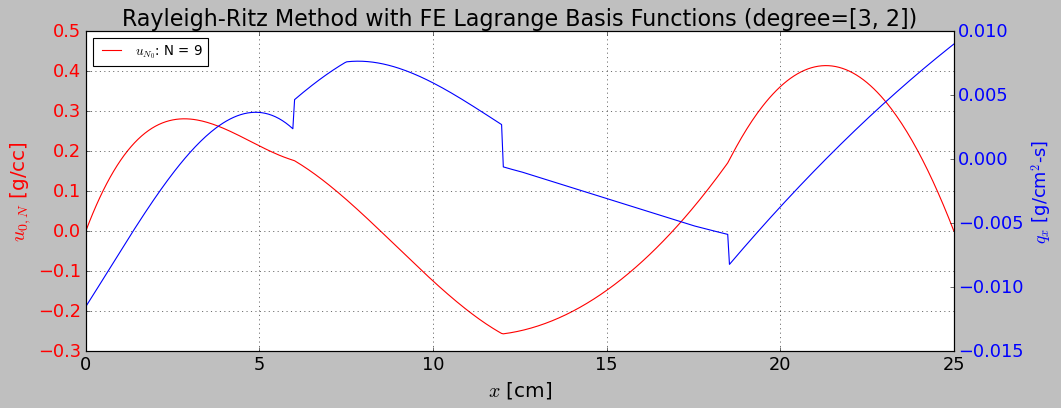

In [17]:
plot_solution()

In [18]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ', u_star(x_a, femlb, c_star_vec), ' u_N(b) = ', u_star(x_b, femlb, c_star_vec))

u_N(a) =  [0.]  u_N(b) =  [0.]


### [Results: Mesh Convergence Homogeneous BC](#toc)<a id="results-homogeneous-mesh-convergence"></a>

In [19]:
'''Mesh convergence test'''

def mesh_convergence(femlb, c_star_vec, bc='homogeneous'):
    
    xpts = np.linspace(x_a, x_b, 30) # points for || ||_2 norm calculation

    femlb_0 = femlb
    c_star_vec_0 = np.copy(c_star_vec)
    u_0 = u_star(xpts, femlb_0, c_star_vec_0)

    cases = [(femlb_0, c_star_vec_0)] # mesh refinement cases
    degree = [2,2]
    
    for i in range(3,10,2):
        n_elem = [i,i]
        femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, 12, x_b], bc_x_min='dirichlet', bc_x_max='dirichlet')
        a_mtrx = get_a_mtrx(femlb)
        if bc == 'homogeneous':
            b_vec = get_b_vec_homogeneous_bc(femlb)
        else:
            b_vec = get_b_vec_inhomogeneous_bc(femlb)
        c_star_vec = np.linalg.solve(a_mtrx, b_vec)
        u = u_star(xpts, femlb, c_star_vec)
        relative_error = np.linalg.norm(u-u_0)/np.linalg.norm(u_0)*100
        print('# elem = %i; relative ||u_%i - u_%i||_2 [%%] = %3.3e'%(i,i,i-1,relative_error))
        cases.append((femlb, c_star_vec))
        c_star_vec_0 = np.copy(c_star_vec)
        femlb_0 = femlb
        u_0 = u_star(xpts, femlb_0, c_star_vec_0)
        if relative_error < 1:
            break
    print('done.')
    return cases

# elem = 3; relative ||u_3 - u_2||_2 [%] = 1.042e+01
# elem = 5; relative ||u_5 - u_4||_2 [%] = 5.341e+00
# elem = 7; relative ||u_7 - u_6||_2 [%] = 1.184e+00
# elem = 9; relative ||u_9 - u_8||_2 [%] = 4.241e-01
done.


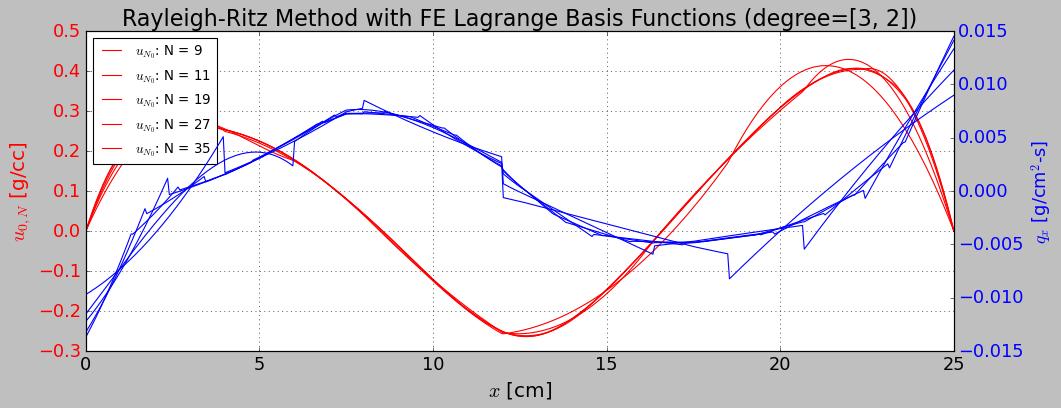

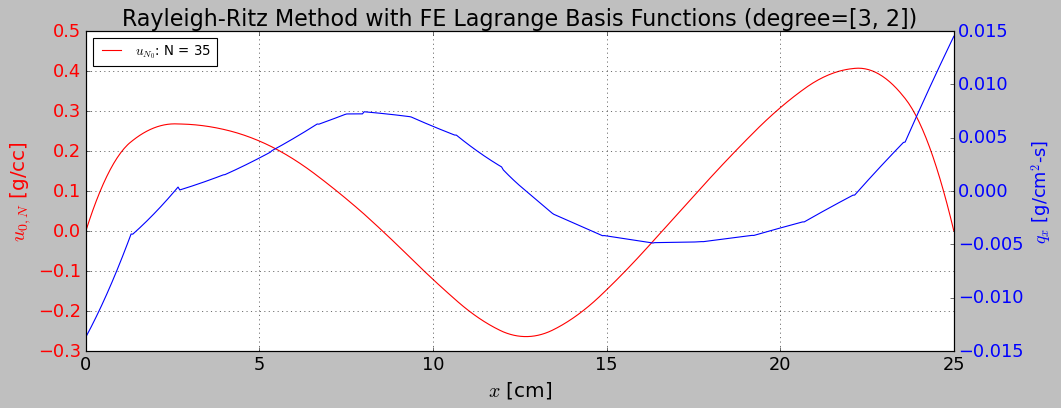

In [20]:
cases = mesh_convergence(femlb, c_star_vec)
plot_solution(cases)
plot_solution([cases[-1]])

In [21]:
#'''Hermite finite element basis functions'''

#try:    
#    from engy_5310.toolkit import HermiteFEMBasis  
#except ModuleNotFoundError:
#    assert False, 'You need to provide your own code here. Bailing out.'
    
#bc = 'homogeneous'
#femhb = HermiteFEMBasis(degree=3, n_elem=[8,8], x_partition=[x_a, 12, x_b], bc_x_min='dirichlet', bc_x_max='dirichlet')
#a_mtrx = get_a_mtrx(femhb)
#if bc == 'homogeneous':
#    b_vec = get_b_vec_homogeneous_bc(femhb)
#else:
#    b_vec = get_b_vec_inhomogeneous_bc(femhb)
#c_star_vec = np.linalg.solve(a_mtrx, b_vec)
#plot_solution([(femhb, c_star_vec)])

## [Rayleigh-Ritz Method w/ Built-in Inhomogeneous Dirichlet Boundary Conditions](#toc)<a id="rayleigh-ritz-inhomogeneous"></a>

Find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
  \norm{u_0+w-u^*_N}^2_{\Ecal} = \min\limits_{u_N\, \in\, V_N} \norm{u_0+w-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid u_N(a) = u_N(b) = 0, (u'_N,u'_N) < \infty \bigr\}$, $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$, and any $w \in V$ with $w(a) = u_a$, $w(b) = u_b$ is called the *lift* function. $u_0 \in V(a,b)$ is the solution of the homogeneous problem.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (D\,\phi'_i,\phi'_j) + (S\,\phi_i,\phi_j)$
  + $b_i = (f,\phi_i) - (D\,w',\phi'_i) + (S\,w,\phi_i)$
  
This formulation uses basis functions that satisfy homogeneous boundary conditions, however the linear algebraic problem for the optimum coefficients accounts for the inhomogeneous boundary condition data through the lift function $w$.

### [Data (Inhomogeneous)](#toc)<a id="data-inhomogeneous"></a>

Solve problem with parameter values:

> + a = 0 cm
> + b = 25 cm
> + $u_a$ = 1 g/cc
> + $u_b$ = 3 g/cc
> + D = same value above cm^2/s
> + S = same value above $s^{-1}$
> + f = same value above g/cc-s

In [22]:
'''Parameters and data'''

u_a = 2
u_b = -3

### [Lift Function](#toc)<a id="lift-function"></a>
Since $w\in V(a,b)$, construct as follows $w = \sum\limits_{i=1}^N\,\alpha_i\,\phi_i$ such that $w(a) = u_a$ and $w(b) = u_b$.

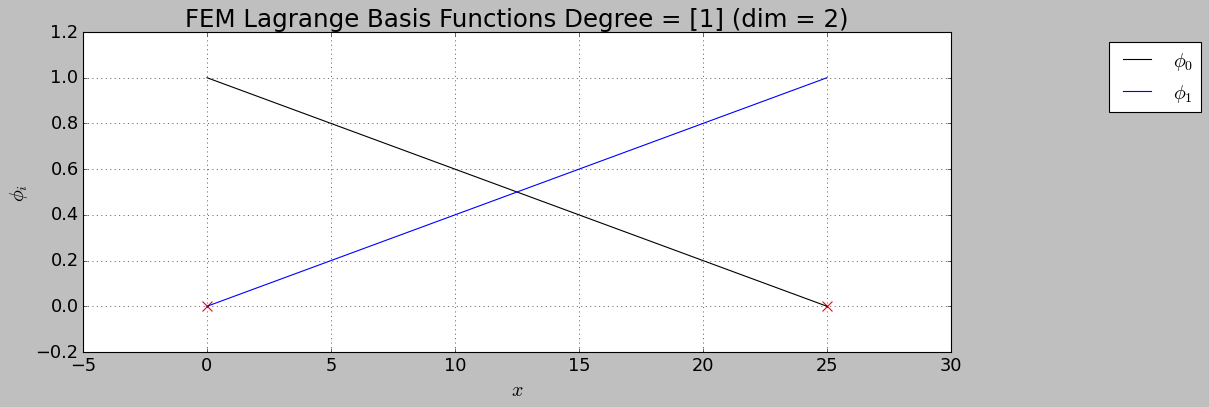

In [23]:
'''Build the lift basis functions'''

degree = 1
n_elem = 1

try:    
    from engy_5310.toolkit import LagrangeFEMBasis  
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
lift_basis = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_b])
lift_basis.plot(n_plot_pts=300)

In [24]:
'''Build the coefficients of the lift function'''

alpha_vec = np.zeros(len(lift_basis.basis_func_list))
alpha_vec[0] = u_a
if degree == 2:
    alpha_vec[-2] = u_b
else:
    alpha_vec[-1] = u_b

In [25]:
'''Build the lift function'''

def w_lift(x):
    a_mtrx = lift_basis.evaluation_matrix(x)
    return a_mtrx@alpha_vec

In [26]:
'''Build the lift function derivative'''

def w_lift_prime(x):
    a_mtrx = lift_basis.evaluation_matrix(x, derivative=True)
    return a_mtrx@alpha_vec

In [27]:
'''Test boundary values'''

print('w(a) = ',w_lift(x_a), ' w(b) = ', w_lift(x_b))

w(a) =  [2.]  w(b) =  [-3.]


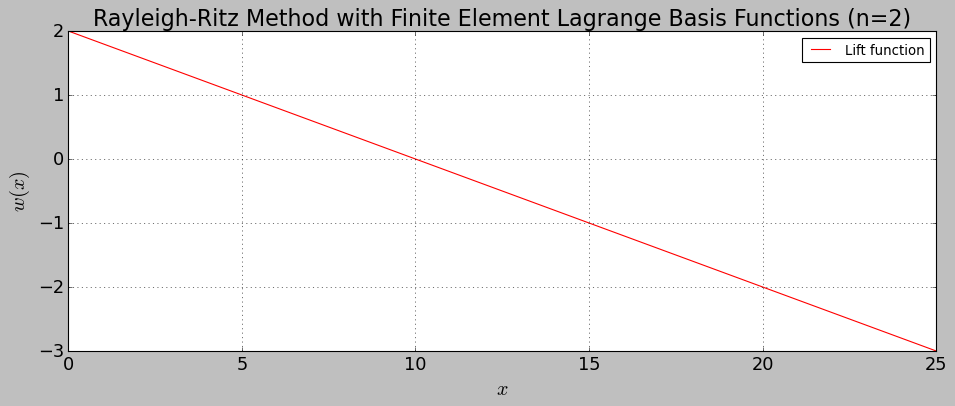

In [28]:
'''Rayleigh Ritz Method with Lagrange Basis Functions'''

n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = w_lift(x)

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x, u_values, 'r-', label='Lift function')

plt.title(r'Rayleigh-Ritz Method with Finite Element Lagrange Basis Functions (n='+str(len(lift_basis.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$w(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

### [Finite Element Lagrange Basis Functions](#toc)<a id="fem-lagrange-basis-inhomogeneous"></a>

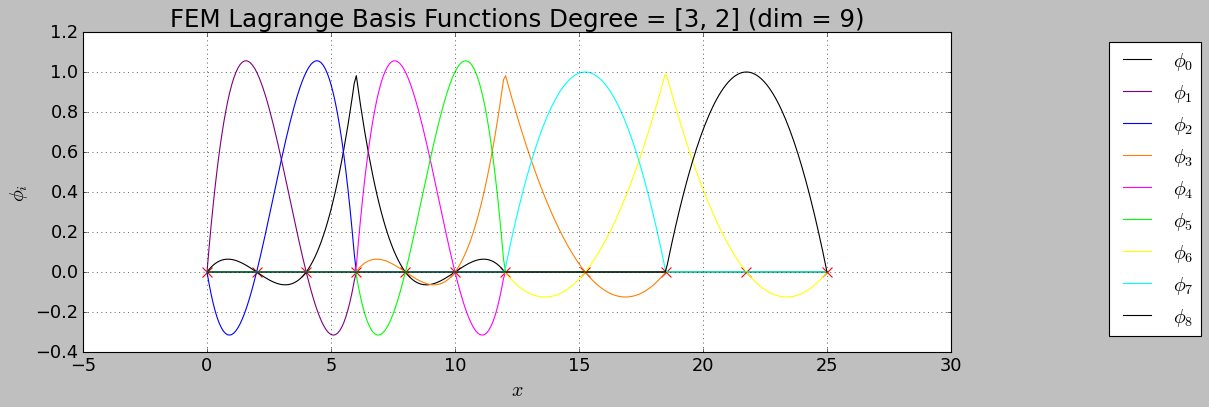

In [29]:
'''Build the basis functions'''

try:    
    from engy_5310.toolkit import LagrangeFEMBasis  
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

degree = [3,2]
n_elem = [2,2]

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, 12, x_b], bc_x_min='dirichlet', bc_x_max='dirichlet')
femlb.plot(n_plot_pts=300)

Build $\Amtrx$:

$A_{i,j} = (D\,\phi'_i,\phi'_j) - (S\,\phi_i,\phi_j)$


In [30]:
a_mtrx = get_a_mtrx(femlb)

In [31]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')

A is full rank.


Build $\bvec$:

$b_i = (f,\phi_i) - (D\,w',\phi'_i) + (S\,w,\phi_i)$


In [32]:
'''Build load vector'''

def get_b_vec_inhomogeneous_bc(femlb):
    
    n = len(femlb.basis_func_list)
    b_vec = np.zeros(n, dtype=np.float64)

    for i, phi_i in enumerate(femlb.basis_func_list):
        (b_vec[i], _) = femlb.inner_product(source_bias, phi_i)
        d_x_w_prime = lambda x: diff_coeff(x) * w_lift_prime(x)
        (term1, _) = femlb.inner_product(d_x_w_prime, femlb.basis_func_prime_list[i])
        b_vec[i] -= term1
        s_x_w = lambda x: source_slope(x) * w_lift(x)
        (term2, _) = femlb.inner_product(s_x_w, phi_i)
        b_vec[i] +=  term2     
        
    return b_vec

In [33]:
b_vec = get_b_vec_inhomogeneous_bc(femlb)

In [34]:
'''Compute optimal coefficient vector'''

c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [35]:
'''Build the best approximation function in V_N'''

def u_star(x, femlb, c_star_vec):
    u_0 = femlb.evaluation_matrix(x)@c_star_vec
    w = lift_basis.evaluation_matrix(x)@alpha_vec
    return u_0 + w

In [36]:
'''Build the derivative '''

def u_prime_star(x, femlb, c_star_vec):
    u_0 = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    w = lift_basis.evaluation_matrix(x, derivative=True)@alpha_vec
    return u_0 + w

### [Results: Inhomogeneous Boundary Conditions Case](#toc)<a id="results-inhomogeneous"></a>

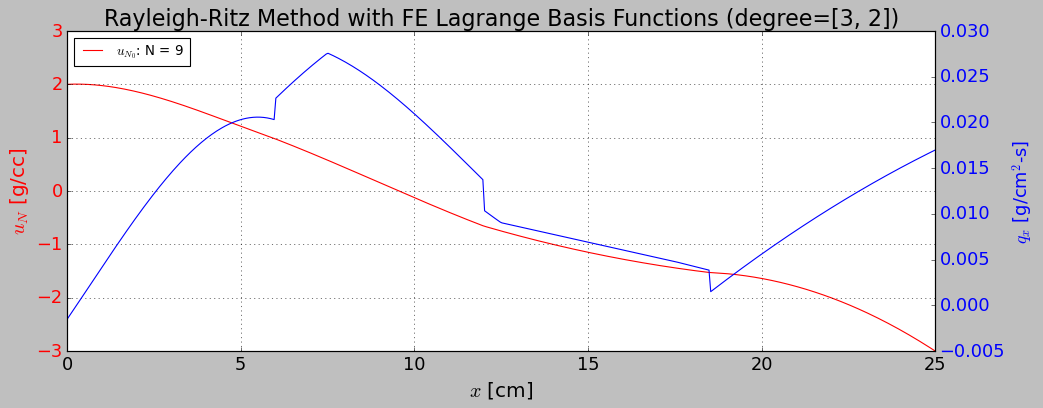

In [37]:
plot_solution(bc='inhomogeneous')

In [38]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ', u_star(x_a, femlb, c_star_vec), ' u_N(b) = ', u_star(x_b, femlb, c_star_vec))

u_N(a) =  [2.]  u_N(b) =  [-3.]


### [Results: Mesh Convergence Inhomogeneous BC](#toc)<a id="results-inhomogeneous-mesh-convergence"></a>

# elem = 3; relative ||u_3 - u_2||_2 [%] = 9.365e+00
# elem = 5; relative ||u_5 - u_4||_2 [%] = 4.206e+00
# elem = 7; relative ||u_7 - u_6||_2 [%] = 8.949e-01
done.


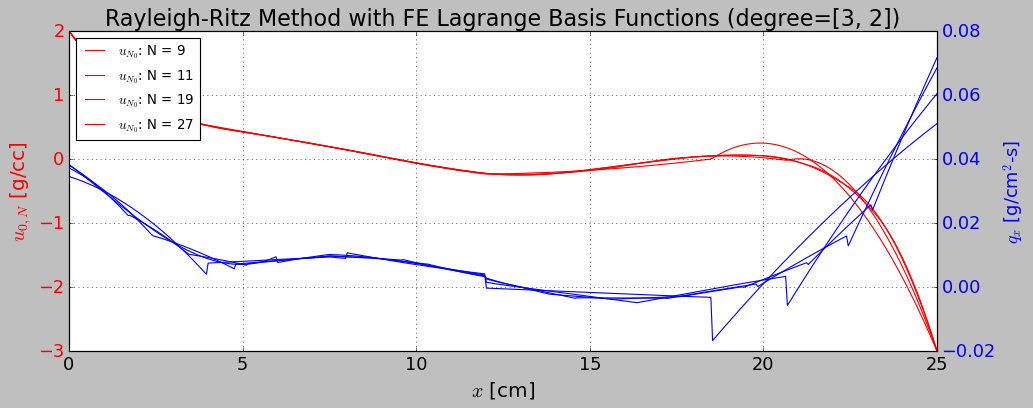

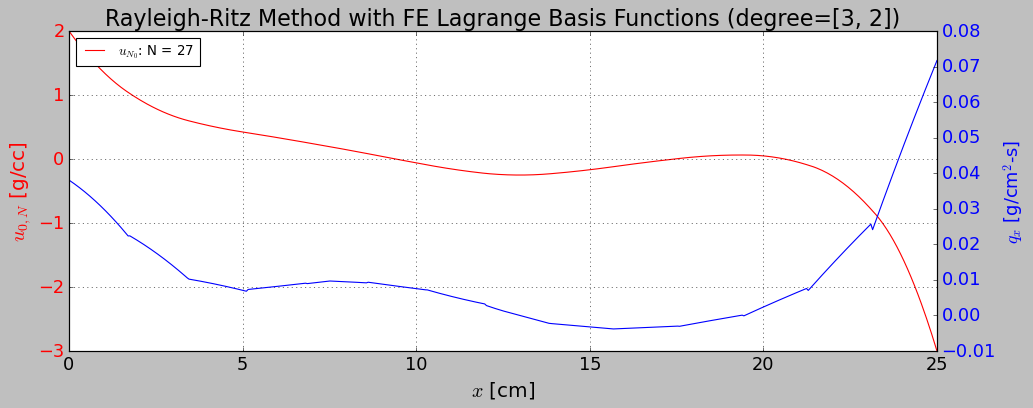

In [39]:
cases = mesh_convergence(femlb, c_star_vec, bc='inhomogeneous')
plot_solution(cases)
plot_solution([cases[-1]])